# Randomness Checker

This code does some simple tests to see if a bit string is random

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import random
np.set_printoptions(suppress=True)

In [166]:
def to_bin_str(x, length):
    return format(x, f"0{length}b")

def all_bit_strings(length):
    strings = []
    for i in range(2**length):
        strings.append(to_bin_str(i, length))
    return strings

def tally_substrings(string, length):
    tallies = [0] * (2**length)
    for i in range(0, len(string) - length + 1, length):
        substring = int(string[i:i + length], 2)
        tallies[substring] += 1
    return np.array(tallies)

def check_substrings(string, length):
    tallies = tally_substrings(string, length)
    _, p = chisquare(tallies)
    return p

def check_random(string):
    max_len_check = min(10, len(string) // 2)
    ps = []
    lengths = np.arange(1, max_len_check + 1)
    for length in lengths:
        ps.append(check_substrings(string, length))
    ps = np.array(ps)
    print(f"The p-values found were\n{np.round(ps, 4)}")
    print(f"{np.count_nonzero(ps <= 0.05)} / {max_len_check} p-values were "
          "significant")
    print(f"The smallest p-value was {np.round(np.min(ps), 6)}")
    plt.plot(lengths, ps)
    plt.plot(lengths, np.full(lengths.shape, 0.05))
    plt.legend(["p-values", "0.05"])
    plt.xlabel("length of substring")
    plt.ylabel("p-value")

def plot_tallies(string, length):
    plt.figure(figsize=(12, 4))
    tallies = tally_substrings(string, length)
    indices = np.arange(tallies.size)
    plt.bar(indices, tallies)
    plt.xticks(indices, [to_bin_str(i, length) for i in indices])
    plt.xlabel(f"strings of length {length}")
    plt.ylabel("frequency")
    print(f"p-value is {chisquare(tallies)[1]}")

The p-values found were
[0.3051 0.0007 0.036  0.0097 0.5276 0.0397 0.0004 0.0193 0.5789 0.547 ]
6 / 10 p-values were significant
The smallest p-value was 0.0004


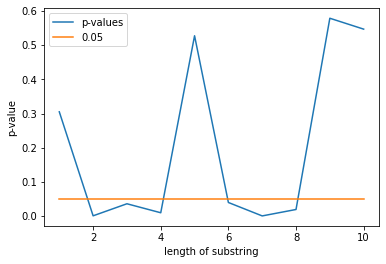

In [143]:
string = "01001100010100010101110101000101111101000001010110010100010100011101001010100"
check_random(string)

p-value is 0.009679905038677352


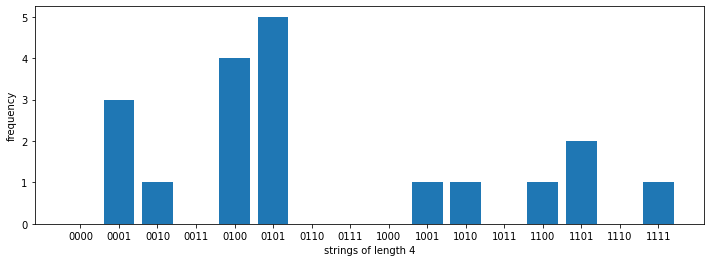

In [145]:
plot_tallies(string, 4)

The p-values found were
[0.21   0.3836 0.8994 0.1508 0.0802 0.4881 0.7266 0.6287 0.5789 0.547 ]
0 / 10 p-values were significant
The smallest p-value was 0.0802


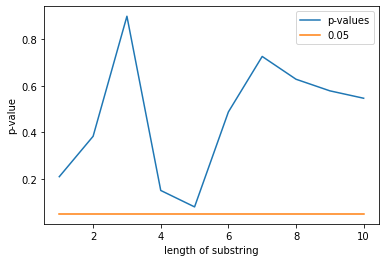

In [136]:
rand_string = "1011001100001001111011110110100111111111011110010111010100000111101" \
              "1000000110"
check_random(rand_string)

p-value is 0.1508299891800008


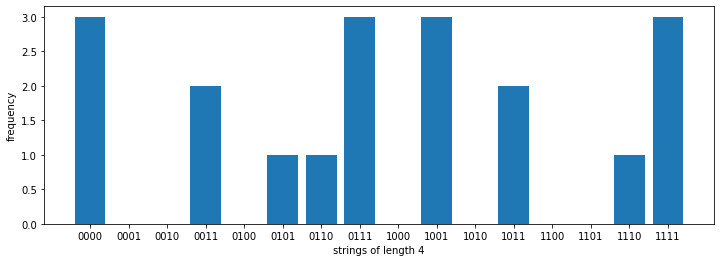

In [146]:
plot_tallies(rand_string, 4)

The p-values found were
[0.0833 0.3443 0.036  0.0004 0.     0.     0.     0.     0.     0.    ]
8 / 10 p-values were significant
The smallest p-value was 0.0


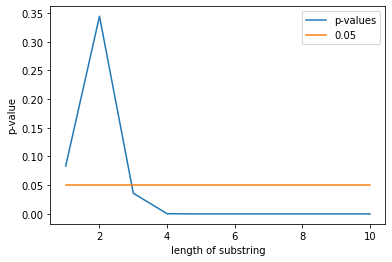

In [167]:
constant_string = "01100" * 15
check_random(constant_string)

p-value is 0.0003594204847651364


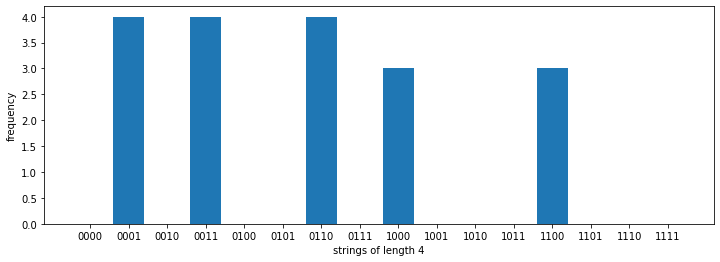

In [169]:
plot_tallies(constant_string, 4)